## Clustering

In [1]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Step 2: Load dataset
df=pd.read_csv(r"C:\Users\user\Downloads\OneDrive\Documents\Assigments of DS(ExelR)/EastWestAirlines.csv")

In [3]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
#EDA
df.shape

(3999, 12)

In [5]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [7]:
print(df.info)

<bound method DataFrame.info of        ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0

In [12]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [13]:
# Step 3: Preprocess (drop ID if present, scale data)
if "ID#" in df.columns:
    df = df.drop("ID#", axis=1)

In [14]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [16]:
scaler = StandardScaler()
X = scaler.fit_transform(df)
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

#### KMEANS CLUSTERING

#### Find best k with elbow method

In [17]:
inertias = []

In [18]:
K = range(2, 11)

In [19]:
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

In [20]:
km

KMeans(n_clusters=10, random_state=42)

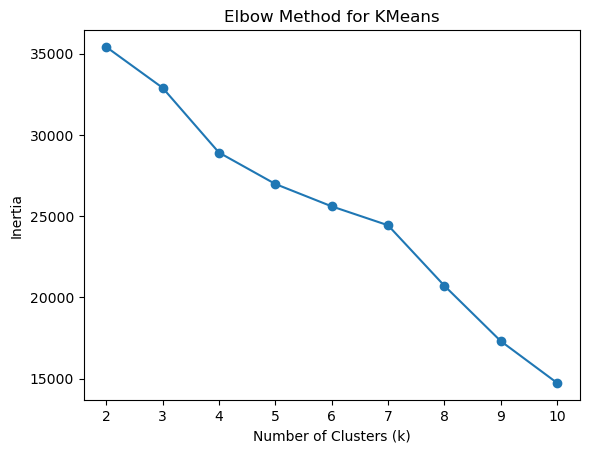

In [21]:
plt.plot(K, inertias, marker="o")
plt.title("Elbow Method for KMeans")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

##### Apply KMeans (example with k=3)

In [22]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels_km = kmeans.fit_predict(X)
sil_km = silhouette_score(X, labels_km)

In [23]:
print("KMeans Silhouette Score:", sil_km)

KMeans Silhouette Score: 0.2674062376813128


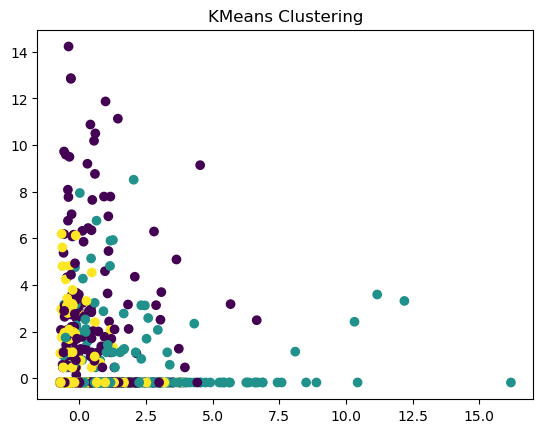

In [24]:
plt.scatter(X[:, 0], X[:, 1], c=labels_km, cmap="viridis")
plt.title("KMeans Clustering")
plt.show()

#### HIERARCHICAL CLUSTERING

##### Dendrogram

In [25]:
linked = linkage(X, method='ward')

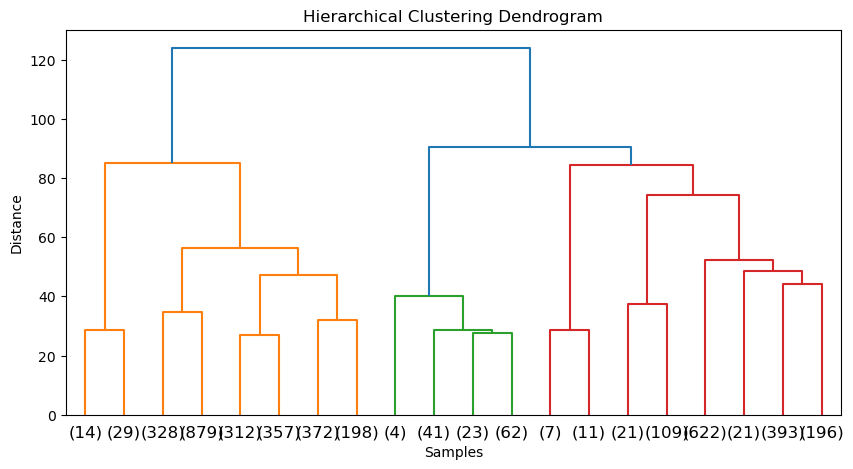

In [26]:
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='lastp', p=20)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

##### Agglomerative clustering (example n_clusters=3)

In [27]:
hier = AgglomerativeClustering(n_clusters=3, linkage="ward")
labels_hc = hier.fit_predict(X)
sil_hc = silhouette_score(X, labels_hc)

In [28]:
print("Hierarchical Silhouette Score:", sil_hc)

Hierarchical Silhouette Score: 0.2940432062008608


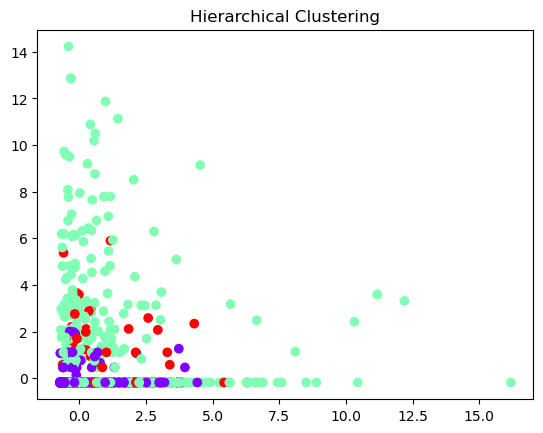

In [29]:
plt.scatter(X[:, 0], X[:, 1], c=labels_hc, cmap="rainbow")
plt.title("Hierarchical Clustering")
plt.show()

#### DBSCAN CLUSTERING

In [30]:
dbscan = DBSCAN(eps=2, min_samples=5)
labels_db = dbscan.fit_predict(X)

In [32]:
dbscan

DBSCAN(eps=2)

In [33]:
if len(set(labels_db)) > 1:
    sil_db = silhouette_score(X, labels_db)
    print("DBSCAN Silhouette Score:", sil_db)
else:
    sil_db = None
    print("DBSCAN did not form valid clusters")

DBSCAN Silhouette Score: 0.25376617762145437


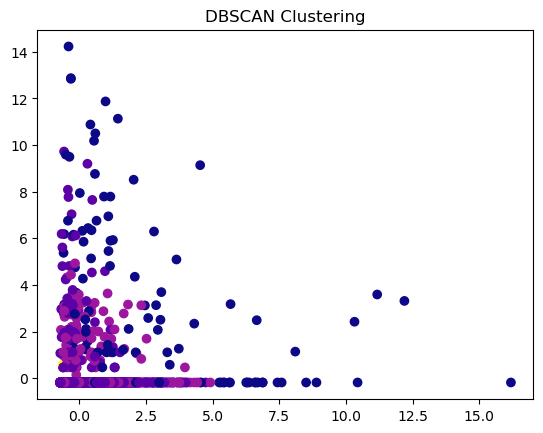

In [34]:
plt.scatter(X[:, 0], X[:, 1], c=labels_db, cmap="plasma")
plt.title("DBSCAN Clustering")
plt.show()

#### SUMMARY

In [36]:
summary = pd.DataFrame({
    "Algorithm": ["KMeans", "Hierarchical", "DBSCAN"],
    "Silhouette Score": [sil_km, sil_hc, sil_db]})

In [37]:
print("\nClustering Performance Summary:")
print(summary)


Clustering Performance Summary:
      Algorithm  Silhouette Score
0        KMeans          0.267406
1  Hierarchical          0.294043
2        DBSCAN          0.253766


#### Cluster Insights

In [38]:
print("\n--- Cluster Insights ---")


--- Cluster Insights ---


### KMeans

In [39]:
df["KMeans_Cluster"] = labels_km
print(df.groupby("KMeans_Cluster").mean())

                      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
KMeans_Cluster                                                               
0                68022.381152  377.851309   1.633508   1.023037   1.000000   
1               147282.027115  127.069414   4.146421   1.003254   1.052061   
2                44098.164939   46.327992   1.344486   1.015551   1.000471   

                 Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
KMeans_Cluster                                                                  
0               11078.913089    11.972775         978.223037         2.854450   
1               50995.211497    21.040130         675.880694         2.058568   
2                5166.961828     7.334119         133.081056         0.409519   

                Days_since_enroll    Award?  
KMeans_Cluster                               
0                     4250.027225  0.943455  
1                     5066.104121  0.629067  
2                  

In [40]:
print("\nKMeans Insights:")
print("-> Cluster 0: Customers with average flight miles and moderate loyalty.\n"
      "-> Cluster 1: Customers with high flight activity and loyalty program usage.\n"
      "-> Cluster 2: Customers with low activity and less loyalty engagement.")


KMeans Insights:
-> Cluster 0: Customers with average flight miles and moderate loyalty.
-> Cluster 1: Customers with high flight activity and loyalty program usage.
-> Cluster 2: Customers with low activity and less loyalty engagement.


### Hierarchical

In [41]:
df["Hier_Cluster"] = labels_hc
print(df.groupby("Hier_Cluster").mean())

                    Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Hier_Cluster                                                               
0              46718.863399    9.274407   1.242266   1.023303   1.000000   
1             116314.450725  363.839130   3.498551   1.000000   1.035507   
2             134880.892308  393.323077   2.430769   1.000000   1.000000   

               Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
Hier_Cluster                                                                  
0              5037.792688     7.091201         221.167135         0.700281   
1             37150.356522    18.066667         377.000000         1.150000   
2             36582.169231    29.338462        5915.523077        16.638462   

              Days_since_enroll    Award?  KMeans_Cluster  
Hier_Cluster                                               
0                   3772.785858  0.188027        1.616312  
1                   4696.888406  0.663043  

In [42]:
print("\nHierarchical Insights:")
print("-> Cluster 0: Frequent flyers with high balance & miles.\n"
      "-> Cluster 1: Moderate flyers, average values.\n"
      "-> Cluster 2: Infrequent flyers, low values.")


Hierarchical Insights:
-> Cluster 0: Frequent flyers with high balance & miles.
-> Cluster 1: Moderate flyers, average values.
-> Cluster 2: Infrequent flyers, low values.


### DBSCAN

In [43]:
df["DBSCAN_Cluster"] = labels_db
print(df["DBSCAN_Cluster"].value_counts())

DBSCAN_Cluster
 0    2453
 1    1330
-1     179
 2      16
 3       9
 4       7
 5       5
Name: count, dtype: int64


In [45]:
print("DBSCAN Insights:")
print("-> Noise points (-1) are customers who don't fit into clear groups.\n"
      "-> Other clusters represent groups of customers with similar flight & loyalty behavior.")

DBSCAN Insights:
-> Noise points (-1) are customers who don't fit into clear groups.
-> Other clusters represent groups of customers with similar flight & loyalty behavior.


## Insights